In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import sklearn
from sklearn import tree
from math import log

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV

C:\Users\jingj\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
note = pd.read_json("data_4.txt")

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

note[['gold', 'rerolls', 'units', 'move_freq']] = scaler.fit_transform(note[['gold', 'rerolls', 'units', 'move_freq']])

#X = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait_encoded']]

X1 = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait']]
# labelencoder = LabelEncoder()
# note['main_trait_encoded'] = labelencoder.fit_transform(note['main_trait'])

X2 = note[['gold', 'rerolls', 'units', 'move_freq']]

X3 = note[['gold', 'rerolls', 'units']]


X1 = pd.get_dummies(X1)

X1 = X1.drop(columns=['main_trait_None'])

y = note[['rank']]


X1.columns

Index(['gold', 'rerolls', 'units', 'move_freq', 'main_trait_Astro',
       'main_trait_Battlecast', 'main_trait_Blaster', 'main_trait_Chrono',
       'main_trait_Cybernetic', 'main_trait_DarkStar',
       'main_trait_Demolitionist', 'main_trait_Infiltrator',
       'main_trait_ManaReaver', 'main_trait_MechPilot', 'main_trait_Mercenary',
       'main_trait_Paragon', 'main_trait_Protector', 'main_trait_Rebel',
       'main_trait_Set3_Blademaster', 'main_trait_Set3_Brawler',
       'main_trait_Set3_Celestial', 'main_trait_Set3_Mystic',
       'main_trait_Set3_Sorcerer', 'main_trait_Sniper',
       'main_trait_SpacePirate', 'main_trait_StarGuardian',
       'main_trait_Starship', 'main_trait_Vanguard'],
      dtype='object')

Linear Regression

R_sq score
0.09827684954451577
0.09797992364248553
[-2.50323552e+01  2.79055376e+00 -1.19529558e+01  3.99730008e-02
 -1.28071714e-01  4.49379109e-02  2.78439731e-02 -5.91434370e-02
  2.22027514e-03  2.70448072e-02 -2.14221856e-01  3.26753762e-02
  6.76357695e-01 -8.70213824e-02 -6.55034093e-02 -2.34493747e-01
  2.81596870e-02  1.36309599e-02  2.76630853e-02 -2.19228946e-02
  3.06371575e-02 -6.89644621e-02  7.34044788e-02 -3.27837149e-02
  2.05639750e-03  3.32354118e-02 -1.40992899e-01  4.62725252e-02]
gold: -25.03236
rerolls: 2.79055
units: -11.95296
move_freq: 0.03997
main_trait_Astro: -0.12807
main_trait_Battlecast: 0.04494
main_trait_Blaster: 0.02784
main_trait_Chrono: -0.05914
main_trait_Cybernetic: 0.00222
main_trait_DarkStar: 0.02704
main_trait_Demolitionist: -0.21422
main_trait_Infiltrator: 0.03268
main_trait_ManaReaver: 0.67636
main_trait_MechPilot: -0.08702
main_trait_Mercenary: -0.06550
main_trait_Paragon: -0.23449
main_trait_Protector: 0.02816
main_trait_Rebel: 0.01363
main_

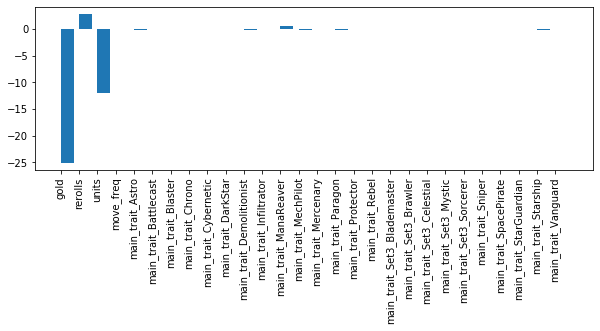

In [23]:
# define the model
model = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
# fit the model
model.fit(X1, y)

print("R_sq score")
print(model.score(X1, y))

model2.fit(X2,y)

print(model2.score(X2,y))

model3.fit(X3,y)
# get importance
importance = model.coef_

print(importance[0])

#summarize feature importance
for i,v in zip(X1.columns, importance[0]):
    print('%s: %.5f' % (i,v))
    
# plot feature importance
pyplot.figure(figsize=(10, 3))
pyplot.bar([x for x in range(len(importance[0]))], importance[0], align='edge', width = 0.7)
pyplot.xticks([x for x in range(len(importance[0]))], X1.columns, rotation='vertical')
pyplot.show()

In [8]:
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

#------model1------------

# number of parameters
# num_params = len(model.coef_) + 1
num_params = 28 + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(X1)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)


#------model2------------
num_params = 4 + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model2.predict(X2)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)


#------model3------------
num_params = 3 + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model3.predict(X3)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)

Number of parameters: 29
MSE: 5.076
BIC: 166042.466
Number of parameters: 5
MSE: 5.078
BIC: 165799.262
Number of parameters: 4
MSE: 5.078
BIC: 165787.945


In [9]:
rfe = RFE(model, 28)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
rfe = RFE(model2, 4)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True]
[1 1 1 1]


Random Forest

C:\Users\jingj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


gold: 0.51791
rerolls: 0.12226
units: 0.11600
move_freq: 0.11303
main_trait_Astro: 0.00250
main_trait_Battlecast: 0.00855
main_trait_Blaster: 0.00452
main_trait_Chrono: 0.00717
main_trait_Cybernetic: 0.00943
main_trait_DarkStar: 0.00825
main_trait_Demolitionist: 0.00032
main_trait_Infiltrator: 0.00380
main_trait_ManaReaver: 0.00013
main_trait_MechPilot: 0.00477
main_trait_Mercenary: 0.00005
main_trait_Paragon: 0.00008
main_trait_Protector: 0.00686
main_trait_Rebel: 0.00532
main_trait_Set3_Blademaster: 0.01093
main_trait_Set3_Brawler: 0.00430
main_trait_Set3_Celestial: 0.00761
main_trait_Set3_Mystic: 0.00429
main_trait_Set3_Sorcerer: 0.00479
main_trait_Sniper: 0.00764
main_trait_SpacePirate: 0.01072
main_trait_StarGuardian: 0.01212
main_trait_Starship: 0.00003
main_trait_Vanguard: 0.00664


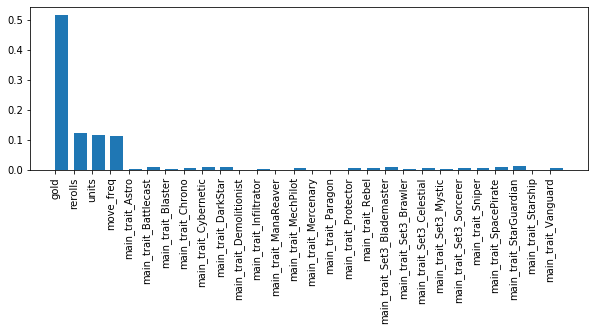

0.8972396157913067
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [39]:
# define the model
model = RandomForestRegressor(n_estimators = 10)
# fit the model
model.fit(X1, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(X1.columns, importance):
    print('%s: %.5f' % (i,v))
# plot feature importance
model.feature_importances_

pyplot.figure(figsize=(10, 3))
pyplot.bar( range(len(model.feature_importances_)), model.feature_importances_, align='edge', width = 0.7)
pyplot.xticks(range(len(model.feature_importances_)), X1.columns, rotation='vertical')
pyplot.show()


print(model.score(X1, y))
print(model.get_params())

C:\Users\jingj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


gold: 0.51785
rerolls: 0.12198
units: 0.11626
move_freq: 0.11362
main_trait_Astro: 0.00251
main_trait_Battlecast: 0.00881
main_trait_Blaster: 0.00451
main_trait_Chrono: 0.00717
main_trait_Cybernetic: 0.00903
main_trait_DarkStar: 0.00851
main_trait_Demolitionist: 0.00034
main_trait_Infiltrator: 0.00384
main_trait_ManaReaver: 0.00012
main_trait_MechPilot: 0.00477
main_trait_Mercenary: 0.00005
main_trait_Paragon: 0.00008
main_trait_Protector: 0.00696
main_trait_Rebel: 0.00540
main_trait_Set3_Blademaster: 0.01064
main_trait_Set3_Brawler: 0.00419
main_trait_Set3_Celestial: 0.00761
main_trait_Set3_Mystic: 0.00418
main_trait_Set3_Sorcerer: 0.00463
main_trait_Sniper: 0.00747
main_trait_SpacePirate: 0.01082
main_trait_StarGuardian: 0.01194
main_trait_Starship: 0.00003
main_trait_Vanguard: 0.00669


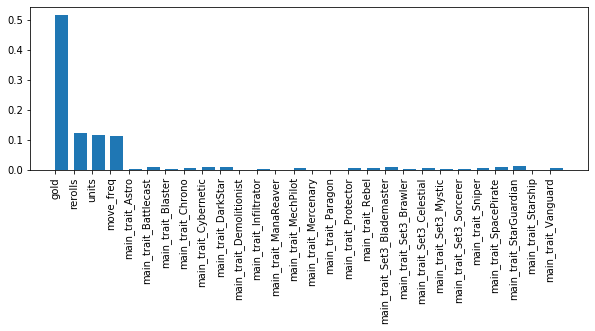

0.9247134040254257
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [40]:
# define the model
model = RandomForestRegressor(n_estimators = 100)
# fit the model
model.fit(X1, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(X1.columns, importance):
    print('%s: %.5f' % (i,v))
# plot feature importance
model.feature_importances_

pyplot.figure(figsize=(10, 3))
pyplot.bar( range(len(model.feature_importances_)), model.feature_importances_, align='edge', width = 0.7)
pyplot.xticks(range(len(model.feature_importances_)), X1.columns, rotation='vertical')
pyplot.show()


print(model.score(X1, y))
print(model.get_params())

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X1, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 71.5min finished
C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [35]:
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

C:\Users\jingj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


gold: 0.81484
rerolls: 0.08041
units: 0.07580
move_freq: 0.01352
main_trait_Astro: 0.00061
main_trait_Battlecast: 0.00094
main_trait_Blaster: 0.00062
main_trait_Chrono: 0.00087
main_trait_Cybernetic: 0.00097
main_trait_DarkStar: 0.00092
main_trait_Demolitionist: 0.00016
main_trait_Infiltrator: 0.00065
main_trait_ManaReaver: 0.00003
main_trait_MechPilot: 0.00084
main_trait_Mercenary: 0.00000
main_trait_Paragon: 0.00004
main_trait_Protector: 0.00082
main_trait_Rebel: 0.00079
main_trait_Set3_Blademaster: 0.00112
main_trait_Set3_Brawler: 0.00076
main_trait_Set3_Celestial: 0.00076
main_trait_Set3_Mystic: 0.00063
main_trait_Set3_Sorcerer: 0.00054
main_trait_Sniper: 0.00073
main_trait_SpacePirate: 0.00085
main_trait_StarGuardian: 0.00100
main_trait_Starship: 0.00002
main_trait_Vanguard: 0.00074


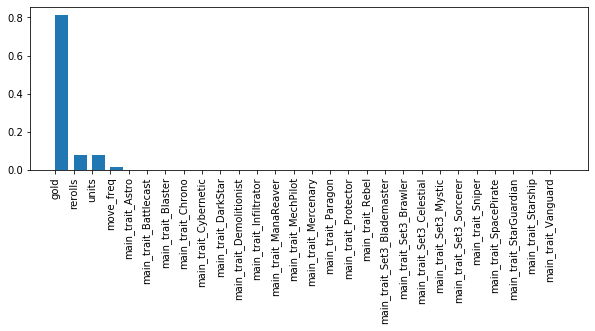

0.5367789734011807
{'bootstrap': True, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 157, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [44]:
# define the model
model = RandomForestRegressor(n_estimators = 157, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto', max_depth = 10, bootstrap = True)
# fit the model
model.fit(X1, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(X1.columns, importance):
    print('%s: %.5f' % (i,v))
# plot feature importance
model.feature_importances_

pyplot.figure(figsize=(10, 3))
pyplot.bar( range(len(model.feature_importances_)), model.feature_importances_, align='edge', width = 0.7)
pyplot.xticks(range(len(model.feature_importances_)), X1.columns, rotation='vertical')
pyplot.show()


print(model.score(X1, y))
print(model.get_params())

In [45]:
print(model.score(X1, y))

0.5367789734011807
